In [0]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from skimage.util import random_noise

**Question 1**

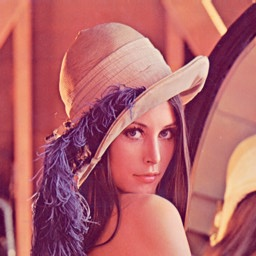

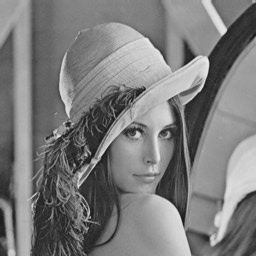

In [0]:
img = cv2.imread('len_std.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)
cv2_imshow(gray_img)

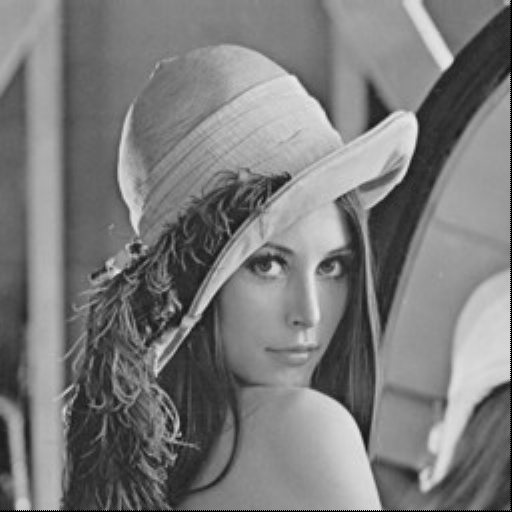

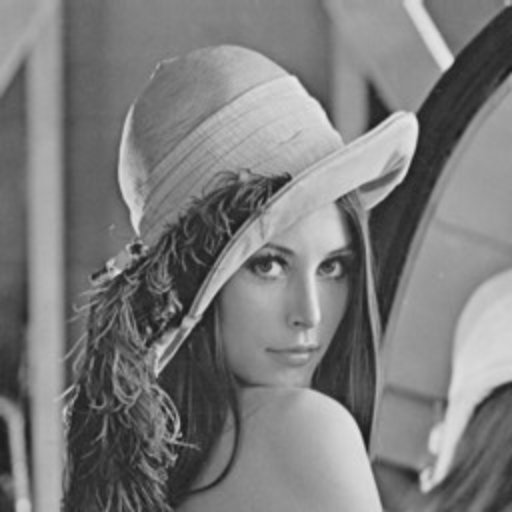

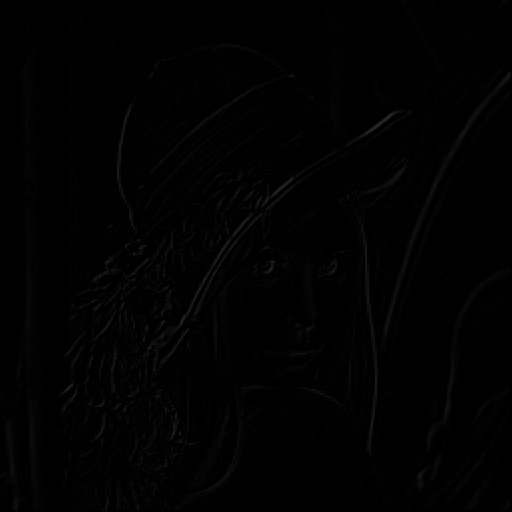

In [0]:
def builtin_re(gray_img1, scale1):
    rescaled_shape = np.array(gray_img1.shape) * scale1
    rescaled_shape = rescaled_shape.astype('int32')
    rescaled_img = cv2.resize(gray_img1, tuple(rescaled_shape))
    return(rescaled_img)

def bilinear_interpolation(x,y,x1,y1,x2,y2,q11,q12,q21,q22):
    # print(x,y,x1,y1,x2,y2,q11,q12,q21,q22)
    # input()
    return (q11 * (x2 - x) * (y2 - y) +
            q21 * (x - x1) * (y2 - y) +
            q12 * (x2 - x) * (y - y1) +
            q22 * (x - x1) * (y - y1)
           ) // ((x2 - x1) * (y2 - y1))


def rescale_img(img, scale = 2):
    rescaled_img = np.ones([int(img.shape[0]*scale),int(img.shape[1]*scale)]) * (-1)
    # for i in range(img.shape[0]):
    #     for j in range(img.shape[1]):
    #         rescaled_img[int(i*scale)][int(j*scale)] = img[i][j]
    rescaled_img[::scale,::scale]=img

    for i in range(rescaled_img.shape[0]):
        for j in range(rescaled_img.shape[1]):
            if(rescaled_img[i][j] == -1):
                x1 = (i//(scale)) * scale
                y1 = (j//(scale)) * scale
                x2 = (x1+scale)
                y2 = (y1+scale)
                if(x2>=rescaled_img.shape[0] or y2>=rescaled_img.shape[1]):
                    rescaled_img[i][j] = 0
                else:
                    rescaled_img[i][j] = bilinear_interpolation(i, j , x1, y1, x2, y2, rescaled_img[x1][y1], rescaled_img[x1][y2], rescaled_img[x2][y1], rescaled_img[x2][y2])
    rescaled_img = rescaled_img.astype(np.uint8)
    return(rescaled_img)

img11 = rescale_img(gray_img,2)
img12 = builtin_re(gray_img,2)
# img21 = rescale_img(gray_img,0.5)
# img22 = builtin_re(gray_img,0.5)

cv2_imshow(img11)
cv2_imshow(img12)
cv2_imshow(cv2.subtract(img11,img12))

**Question 2**

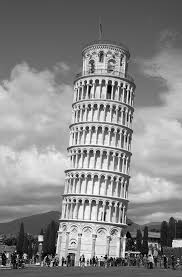

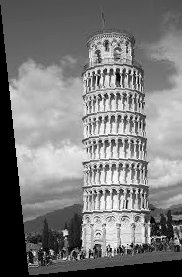

In [0]:
img = cv2.imread('leaning_tower.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# rows,cols = gray_img.shape
# cv2_imshow(gray_img)
# rot_matrix = cv2.getRotationMatrix2D((cols/2,rows/2), 5.5, 1)
# img_rot = cv2.warpAffine(gray_img, rot_matrix, (cols,rows))
# cv2_imshow(img_rot)
import math
angle = 6
angle = angle*math.pi/180
cosx = math.cos(angle)
sinx = math.sin(angle)
affinity_matrix = np.array([[cosx,-sinx],[sinx,cosx]])
rot_img = np.zeros(gray_img.shape)
for i in range(gray_img.shape[0]):
  for j in range(gray_img.shape[1]):
    x = np.array([[i],[j]])
    loc = np.matmul(affinity_matrix,x)
    x_cord = int(round(loc[0][0]))
    y_cord = int(round(loc[1][0]))
    if(x_cord>=0 and y_cord>=0 and x_cord<gray_img.shape[0] and y_cord<gray_img.shape[1]):
      rot_img[x_cord][y_cord] = gray_img[i][j]

for i in range(rot_img.shape[0]-1,-1,-1):
  for j in range(rot_img.shape[1]-1,-1,-1):
    if(rot_img[i][j] == 0):
      
      x1 = i-1
      y1 = j-1
      x2 = (i+1)
      y2 = (j+1)
      if(x2>=rot_img.shape[0] or y2>=rot_img.shape[1]):
          rot_img[i][j] = 0
      else:
          rot_img[i][j] = bilinear_interpolation(i, j , x1, y1, x2, y2, rot_img[x1][y1], rot_img[x1][y2], rot_img[x2][y1], rot_img[x2][y2])
cv2_imshow(gray_img)
cv2_imshow(rot_img)


**Question 3**

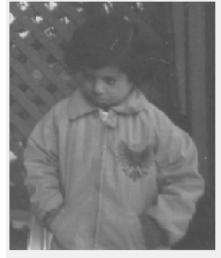

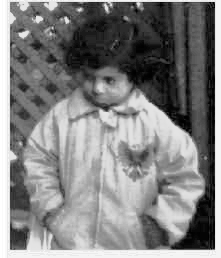

In [0]:
img = cv2.imread('pout-dark.jpg',0)
cv2_imshow(img)
equ_img = cv2.equalizeHist(img)
cv2_imshow(equ_img)

**Question 4**

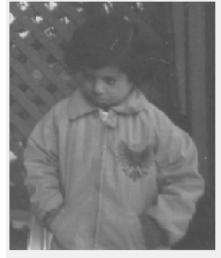

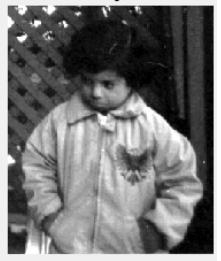

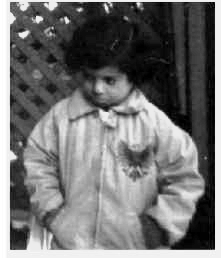

In [0]:
from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms

dark_img = cv2.imread('pout-dark.jpg',0)
bright_img = cv2.imread('pout-bright.jpg',0)
cv2_imshow(dark_img)
cv2_imshow(bright_img)

hist_matched_img = match_histograms(dark_img, bright_img)

cv2_imshow(hist_matched_img)